In [1]:
project_name = "google-play-store-eda"

In [2]:
!pip install jovian --upgrade -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


**Data Preparation and Cleaning**

In this section, we will be loading the Google Store Apps data stored in csv using pandas which is a fast and powerful python library for data analysis and easy data manipulation in pandas DataFrame object. It is usually used for working with tabular data (e.g data in spreadsheet) in various formats such as CSV, Excel spreadsheets, HTML tables, JSON etc. We will then perform some data preparation and also cleaning on it.

In [5]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [6]:
apps_df = pd.read_csv('/content/googleplaystore.csv')

In [7]:
# look at the first 10 records in the apps dataframe
apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [8]:
# look at the random 10 records in the apps dataframe
apps_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5019,AE FreeCell,GAME,4.2,358,15M,"10,000+",Free,0,Everyone,Card,"November 6, 2014",1.1.5,2.3 and up
1063,Cash App,FINANCE,4.0,34428,15M,"10,000,000+",Free,0,Everyone,Finance,"August 2, 2018",2.31.1,5.0 and up
10440,Forgotten Hill: Puppeteer,GAME,4.5,2917,22M,"100,000+",Free,0,Teen,Adventure,"October 30, 2017",2.6,2.3 and up
10013,Rescue Robots Survival Games,GAME,4.0,27557,69M,"5,000,000+",Free,0,Teen,Action,"July 6, 2018",F2i,4.1 and up
10244,Barcelona Calendar,SPORTS,4.4,670,3.1M,"10,000+",Free,0,Everyone,Sports,"November 17, 2017",2.2,4.0.3 and up
4812,GO Launcher - 3D parallax Themes & HD Wallpapers,PERSONALIZATION,4.5,7464996,Varies with device,"100,000,000+",Free,0,Everyone,Personalization,"August 3, 2018",Varies with device,Varies with device
10094,EY Catalyst Reader,BUSINESS,NaN,1,8.4M,5+,Free,0,Everyone,Business,"April 10, 2018",1.2.1,5.0 - 7.1.1
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up
5847,Lunar Calendar,LIFESTYLE,4.5,484,Varies with device,"1,000+",Paid,$4.99,Mature 17+,Lifestyle,"July 17, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


Description of App Dataset columns

App : The name of the app

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [9]:
# type of Category
apps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
# type of Category
apps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
# type of Type
apps_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [12]:
# type of Content Rating
apps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [13]:
# type of Genres
apps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [14]:
# look that the info of the dataframe
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Some Data Cleaning**

In [15]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
reviews = [i for i in apps_df['Reviews']]

def clean_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

apps_df['Reviews'] = clean_reviews(reviews)
apps_df['Reviews'] = apps_df['Reviews'].astype(float)

In [16]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = apps_df[apps_df['Size'] == '1,000+'].index
apps_df.drop(axis=0, inplace=True, index=index)

sizes = [i for i in apps_df['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

apps_df['Size'] = clean_sizes(sizes)
apps_df['Size'] = apps_df['Size'].astype(float)

In [17]:
# 3) clean the 'Installs' data and change the type 'object' to 'float'
installs = [i for i in apps_df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
apps_df['Installs'] = clean_installs(installs)
apps_df['Installs'] = apps_df['Installs'].astype(float)

In [18]:
# 4) clean the 'Price' data and change the type 'object' to 'float'
prices = [i for i in apps_df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

apps_df['Price'] = clean_prices(prices)
apps_df['Price'] = apps_df['Price'].astype(float)

In [19]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
apps_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10612,"Clearwater, FL - weather and more",WEATHER,NaN,0.0,3.9,10.0,Free,0.0,Everyone,Weather,"April 12, 2018",1.0,5.0 and up
7257,Wallpapers DAF CF 85 Trucks,PERSONALIZATION,NaN,0.0,16.0,10.0,Free,0.0,Teen,Personalization,"April 29, 2017",1.0,4.1 and up
8633,To Do List,PRODUCTIVITY,4.7,253155.0,3.5,5000000.0,Free,0.0,Everyone,Productivity,"March 19, 2018",3.0.17,4.0 and up
4351,M Launcher -Marshmallow 6.0,PERSONALIZATION,4.4,37234.0,7.3,1000000.0,Free,0.0,Everyone,Personalization,"March 22, 2018",1.4.9,4.1 and up
5335,Al Mayadeen,NEWS_AND_MAGAZINES,4.7,13620.0,9.0,500000.0,Free,0.0,Everyone,News & Magazines,"April 16, 2018",2.137,4.1 and up
5788,Axe Champ Hit,GAME,NaN,1.0,15.0,100.0,Free,0.0,Everyone,Arcade,"May 25, 2018",0.1,4.1 and up
1396,Calorie Counter - Macros,HEALTH_AND_FITNESS,4.0,3061.0,5.5,100000.0,Free,0.0,Everyone,Health & Fitness,"August 27, 2016",2.3.4,5.0 and up
1471,DIY On A Budget,HOUSE_AND_HOME,4.7,114.0,8.3,10000.0,Free,0.0,Teen,House & Home,"February 18, 2018",2.1,4.1 and up
1919,Crossy Road,GAME,4.5,4230886.0,60.0,100000000.0,Free,0.0,Everyone,Action,"August 1, 2018",3.1.0,5.0 and up
3286,High-Powered Flashlight,TOOLS,4.5,429580.0,0.0,10000000.0,Free,0.0,Everyone,Tools,"March 16, 2018",Varies with device,Varies with device


In [20]:
# check on null values
apps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [21]:
def replace_with_median(series):
    """
    Given a series, replace the rows with null values 
    with median values
    """
    return series.fillna(series.median())

apps_df['Rating'] = apps_df['Rating'].transform(replace_with_median)
apps_df['Rating'] = apps_df['Rating'].astype(float)

In [22]:
# remove the record where 'Type' is having null value
index = apps_df[apps_df['Type'].isna()].index
apps_df.drop(axis=0, inplace=True, index=index)

In [23]:
# check on null values
apps_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [24]:
apps_df = apps_df.groupby(['App', 'Reviews', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 
                           'Last Updated', 'Current Ver', 'Android Ver'], as_index=False)
# reassign Installs values with their mean
apps_df = apps_df['Installs'].mean()
# sort the dataframe by Reviews descendingly
apps_df.sort_values(by='Reviews', ascending=False, inplace=True)
# drop duplicate rows based on App 
apps_df.drop_duplicates(subset=['App'], inplace=True)
apps_df

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4534,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
9661,WhatsApp Messenger,69119316.0,COMMUNICATION,4.4,0.0,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5731,Instagram,66577446.0,SOCIAL,4.5,0.0,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.000000e+09
6546,Messenger – Text and Video Chat for Free,56646578.0,COMMUNICATION,4.0,0.0,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09
2701,Clash of Clans,44893888.0,GAME,4.6,98.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,FG Autumn Photo Puzzle,0.0,FAMILY,4.3,4.6,Free,0.0,Everyone,Puzzle,"August 23, 2017",1.0,4.0 and up,1.000000e+01
4369,FE Other Disciplines Engineering Exam Prep,0.0,FAMILY,4.3,21.0,Free,0.0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,1.000000e+02
9033,Thyroid Nodules,0.0,MEDICAL,4.3,20.0,Free,0.0,Everyone,Medical,"July 14, 2018",1.0,4.3 and up,1.000000e+01
185,ACCEPT CE MARKING,0.0,PRODUCTIVITY,4.3,30.0,Free,0.0,Everyone,Productivity,"June 28, 2018",1.0,4.1 and up,1.000000e+01


In [25]:
# check on statistical information of the dataframe
apps_df.describe()

,Reviews,Rating,Size,Price,Installs
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9.648000e+03
mean,2.170487e+05,4.192485,17.820208,1.098122,7.806898e+06
std,1.832460e+06,0.496210,21.503151,16.861193,5.379975e+07
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00
25%,2.500000e+01,4.000000,2.900000,0.000000,1.000000e+03
50%,9.745000e+02,4.300000,9.200000,0.000000,1.000000e+05
75%,2.949750e+04,4.500000,25.000000,0.000000,1.000000e+06
max,7.815831e+07,5.000000,100.000000,400.000000,1.000000e+09


# **Exploratory Analysis and Visualization**

**Category**

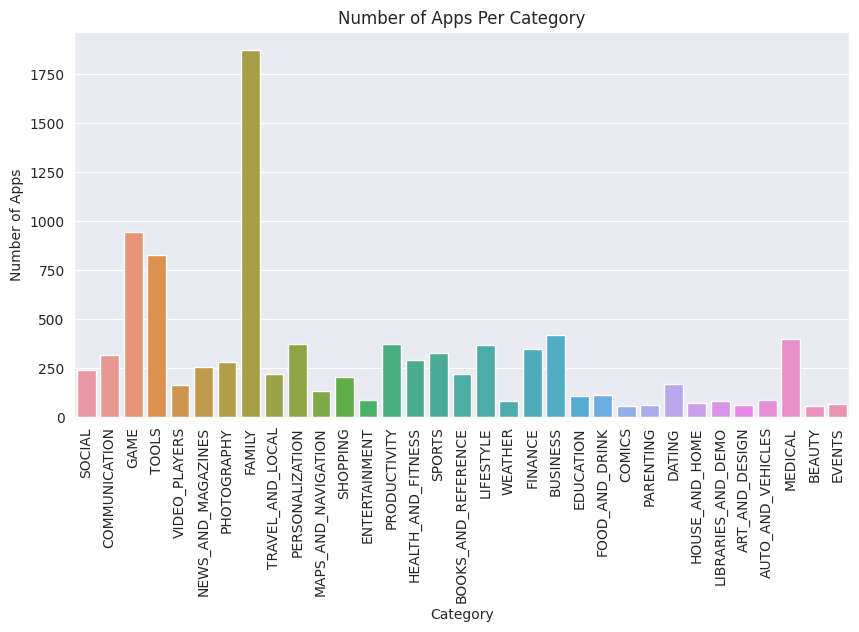

In [27]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=apps_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

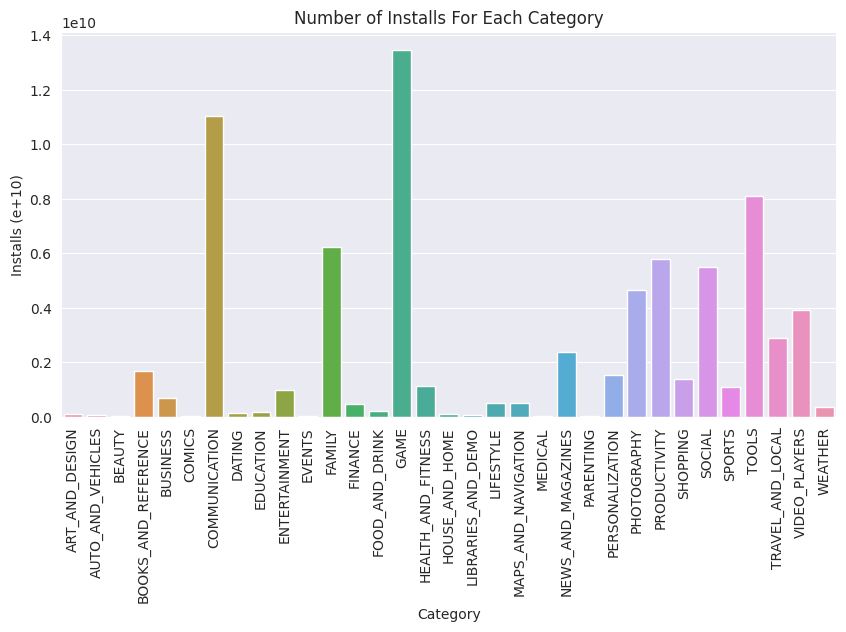

In [28]:
# get the number of installs for each category
categories = apps_df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

**Rating**

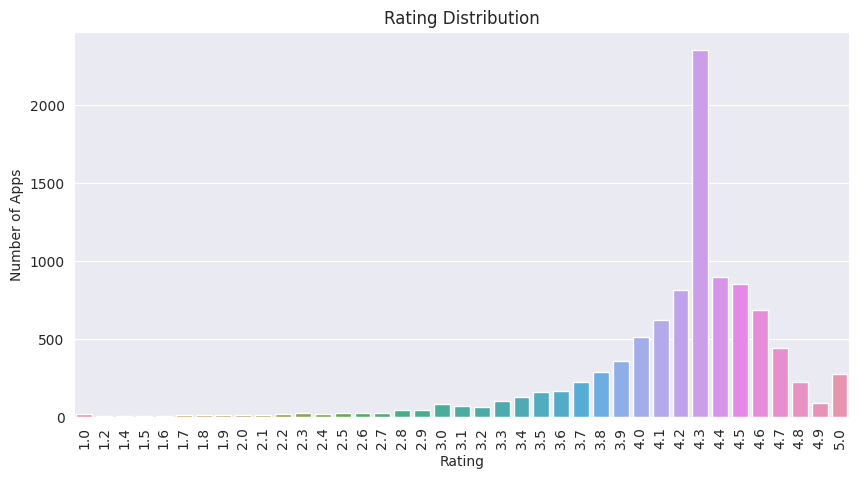

In [29]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=apps_df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

<ipython-input-30-b1ba83ed2deb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_df = apps_df.groupby('Rating').sum().reset_index()


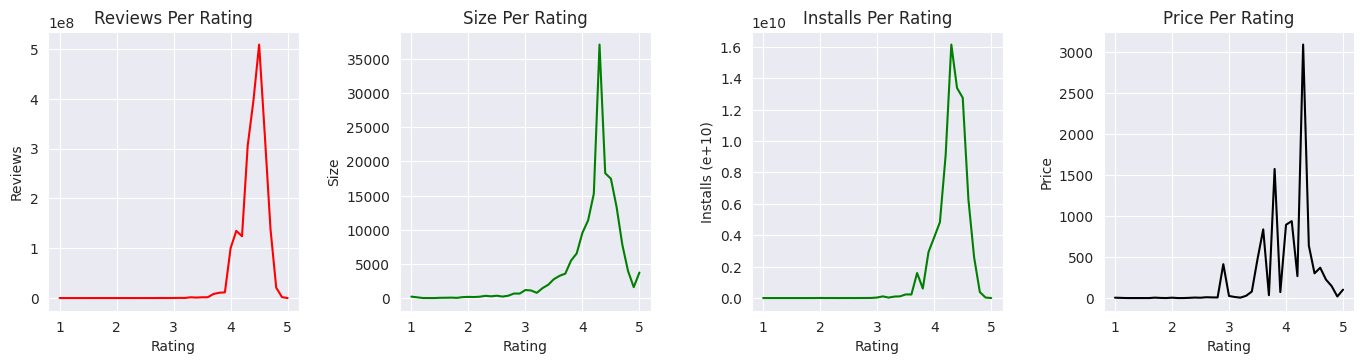

In [30]:
# plot the graphs of reviews, size, installs and price per rating
rating_df = apps_df.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

From the above plottings, we can imply that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

In [36]:
# correlation
apps_df.corr()

<ipython-input-36-1842d48a8da1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  apps_df.corr()


,Reviews,Rating,Size,Price,Installs
Reviews,1.000000,0.050280,0.037812,-0.007597,0.625051
Rating,0.050280,1.000000,0.027338,-0.018585,0.034393
Size,0.037812,0.027338,1.000000,-0.015033,-0.007803
Price,-0.007597,-0.018585,-0.015033,1.000000,-0.009418
Installs,0.625051,0.034393,-0.007803,-0.009418,1.000000


<ipython-input-37-b09c105fa6d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(apps_df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)


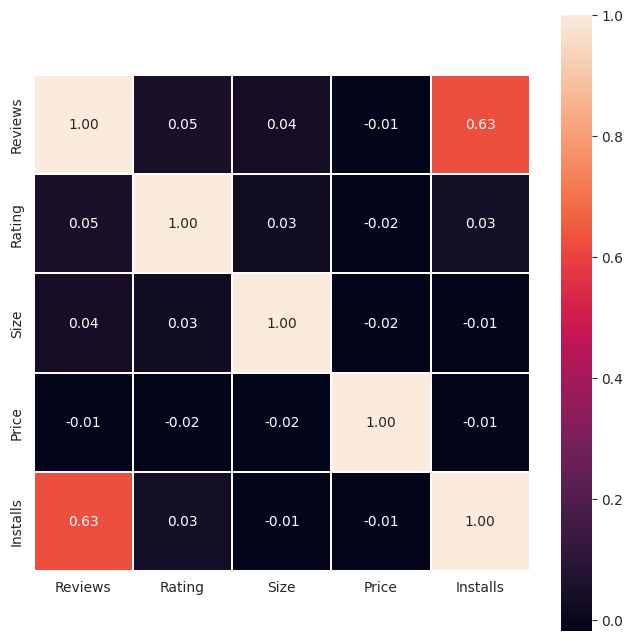

In [37]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(apps_df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

# **Q&A**

In [38]:
# 1. What is the top 5 apps on the basis of installs?
df = apps_df.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4534,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5211,Google Photos,10859051.0,PHOTOGRAPHY,4.5,0.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,1.000000e+09
5229,Google+,4831125.0,SOCIAL,4.2,0.0,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device,1.000000e+09
5122,Gmail,4604483.0,COMMUNICATION,4.3,0.0,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,1.000000e+09
5221,Google Street View,2129707.0,TRAVEL_AND_LOCAL,4.2,0.0,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device,1.000000e+09


In [39]:
print(f'The 5 apps that have the most number of installs are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of installs are: Facebook, Google Photos, Google+, Gmail, Google Street View


In [40]:
# 2. What is the top 5 reviewed apps?
df = apps_df.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews
4324,Facebook,SOCIAL,4.1,78158306.0
9031,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0
5395,Instagram,SOCIAL,4.5,66577446.0
6158,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0
2562,Clash of Clans,GAME,4.6,44893888.0


In [41]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of total reviews are: Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans


In [42]:
# 3. What is the top 5 expensive apps?
df = apps_df.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
5653,I'm Rich - Trump Edition,275.0,LIFESTYLE,3.6,7.3,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000.0
5654,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0.0,LIFESTYLE,4.3,40.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,0.0
5643,I am Rich Plus,856.0,FAMILY,4.0,8.7,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,10000.0
5648,I am rich (Most expensive app),129.0,FINANCE,4.1,2.7,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,1000.0
5627,I Am Rich Premium,1867.0,FINANCE,4.1,4.7,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,50000.0


In [43]:
print(f'The top 5 most expensive apps in the store are: {", ".join(df["App"].head(5))}')

The top 5 most expensive apps in the store are: I'm Rich - Trump Edition, I'm Rich/Eu sou Rico/أنا غني/我很有錢, I am Rich Plus, I am rich (Most expensive app), I Am Rich Premium


In [44]:
# 4. What is the top 3 most installed apps in Game category?
df = apps_df[apps_df['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head(3)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
8619,Subway Surfers,27725352.0,GAME,4.5,76.0,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1.000000e+09
2480,Candy Crush Saga,22430188.0,GAME,4.4,74.0,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,5.000000e+08
6849,My Talking Tom,14892469.0,GAME,4.5,0.0,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,5.000000e+08


In [45]:
print(f'The top 3 most expensive apps in the GAME category are: {", ".join(df["App"].head(3))}')

The top 3 most expensive apps in the GAME category are: Subway Surfers, Candy Crush Saga, My Talking Tom


In [46]:
# 5. Which 5 apps from the 'FAMILY' category are having the lowest rating?
df = apps_df[apps_df['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4366,FE Mechanical Engineering Prep,2.0,FAMILY,1.0,21.0,Free,0.00,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,1000.0
9187,Truck Driving Test Class 3 BC,1.0,FAMILY,1.0,2.0,Paid,1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up,50.0
8494,Speech Therapy: F,1.0,FAMILY,1.0,16.0,Paid,2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,10.0
168,AC REMOTE UNIVERSAL-PRO,402.0,FAMILY,1.6,1.7,Free,0.00,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up,100000.0
1106,BG TV App,6.0,FAMILY,1.7,2.9,Free,0.00,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up,100.0


In [47]:
print(f'The 5 apps from the FAMILY category having the lowest rating are: {", ".join(df["App"].head(5))}')

The 5 apps from the FAMILY category having the lowest rating are: FE Mechanical Engineering Prep, Truck Driving Test Class 3 BC, Speech Therapy: F, AC REMOTE UNIVERSAL-PRO, BG TV App


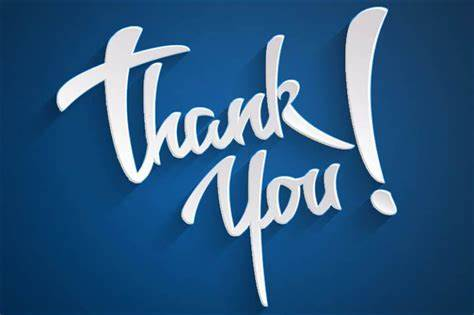